# Proyecto del Sprint 9.

Para este proyecto se estarán realizando las prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Nuestra primer tarea es ayudar a optimizar los gastos de marketing. 

Para desarrollar este proyecto tenemos datos de la empresa Showz desde enero de 2017 hasta diciembre de 2018, un archivo con pedidos y otro con las estadísticas de gastos de marketing.

Se investigarán:
* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.

In [127]:
# # Importamos las liberias que requeriremos para el desarrollo del proyecto.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [128]:
visitas = pd.read_csv('visits_log_us.csv')
costos = pd.read_csv('costs_us.csv')
ordenes = pd.read_csv('orders_log_us.csv')

In [129]:
# Creamos una función para el análisis de los dataframes.

def analisis_exploratorio_df(data):
    print(data.head())
    print()
    print(data.info())
    print()
    print('Valores austentes:')
    print(data.isna().sum())
    print()
    print('Filas duplicadas: ', data.duplicated().sum())

In [130]:
analisis_exploratorio_df(visitas)

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usag

In [131]:
# Creamos una funsión para la limpieza de las columnas en los dataframes.

def limpiar_columnas(data):
    
    new_columns = []

    for columna in data.columns:
        columna_limpia = columna.lower()
        columna_limpia = columna_limpia.replace(' ', '_')
        new_columns.append(columna_limpia)

    data.columns = new_columns

    return data

In [132]:
# Limpieza de data con la función creada.

visitas = limpiar_columnas(visitas)

In [133]:
# Modificación del formato de fecha a dos columnas.

visitas['start_ts'] = pd.to_datetime(visitas['start_ts'], format = '%Y-%m-%d %H:%M:%S')
visitas['end_ts'] = pd.to_datetime(visitas['end_ts'], format = '%Y-%m-%d %H:%M:%S')

In [134]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [135]:
# Visualización de cuantas visitas tengo por dispositivo.

visitas.value_counts('device')

device
desktop    262567
touch       96833
Name: count, dtype: int64

In [136]:
# Conocer el número de visiatas de acuerdo a los canales de publidad contratados.

visitas.value_counts('source_id')

source_id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: count, dtype: int64

Estas fuentes se refieren a las utms, para poder monitorear las diferentes campañas que se lanzan desde google apps, campañas de anuncios se pueden monitorear, traquear, a través de sus fuentes. 

In [138]:
# Conocer cual fue el termino de nuestra primera y última visita.

print(visitas['start_ts'].min())
print(visitas['start_ts'].max())
print(visitas['end_ts'].min())
print(visitas['end_ts'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00
2017-06-01 00:02:00
2018-06-01 01:26:00


In [139]:
visitas[visitas['end_ts'] > '2018-06-01']

,device,end_ts,source_id,start_ts,uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9951896961656595558
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366


In [140]:
analisis_exploratorio_df(ordenes)

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

Valores austentes:
Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Filas duplicadas:  0


In [141]:
# Limpieza de las columnas del dataframe.

ordenes = limpiar_columnas(ordenes)

In [142]:
# Modificación del tipo de dato en columna.

ordenes['buy_ts'] = pd.to_datetime(ordenes['buy_ts'], format = '%Y-%m-%d %H:%M:%S')

In [143]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [144]:
# ¿Cuál día se realizaron nuestra primera y última orden? 

print(ordenes['buy_ts'].min())
print(ordenes['buy_ts'].max())

2017-06-01 00:10:00
2018-06-01 00:02:00


In [145]:
analisis_exploratorio_df(costos)

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

Valores austentes:
source_id    0
dt           0
costs        0
dtype: int64

Filas duplicadas:  0


In [146]:
# Limpieza de columnas en data de costos.

costos = limpiar_columnas(costos)

In [147]:
# Cambio de tipo de data en una columna.

costos['dt'] = pd.to_datetime(costos['dt'])

In [148]:
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [149]:
print(costos['dt'].min())
print(costos['dt'].max())

2017-06-01 00:00:00
2018-05-31 00:00:00


# Visitas:

1. ¿Cuántas personas lo usan cada día, semana y mes?<br>
2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).<br>
3. ¿Cuál es la duración de cada sesión?<br>
4. ¿Con qué frecuencia los usuarios regresan?

In [151]:
visitas['sesion_mes'] = visitas['start_ts'].dt.month
visitas['sesion_semana'] = visitas['start_ts'].dt.isocalendar().week
visitas['sesion_fecha'] = visitas['start_ts'].dt.date

In [152]:
visitas.head()

,device,end_ts,source_id,start_ts,uid,sesion_mes,sesion_semana,sesion_fecha
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,12,52,2017-12-27


In [153]:
visitas_agregadas_por_dia = visitas.groupby('sesion_fecha')['uid'].nunique().sort_index()

In [154]:
visitas_agregadas_por_semana = visitas.groupby('sesion_semana')['uid'].nunique().sort_index()

In [155]:
visitas_agregadas_por_mes = visitas.groupby('sesion_mes')['uid'].nunique().sort_index()

### Usuarios por día, semana y mes.

In [157]:
print('Promedio de usuarios por día: ', round(visitas_agregadas_por_dia.mean()))
print('Promedio de usuarios por semana: ', round(visitas_agregadas_por_semana.mean()))
print('Promedio de usuarios por mes: ', round(visitas_agregadas_por_mes.mean()))

Promedio de usuarios por día:  908
Promedio de usuarios por semana:  5825
Promedio de usuarios por mes:  23228


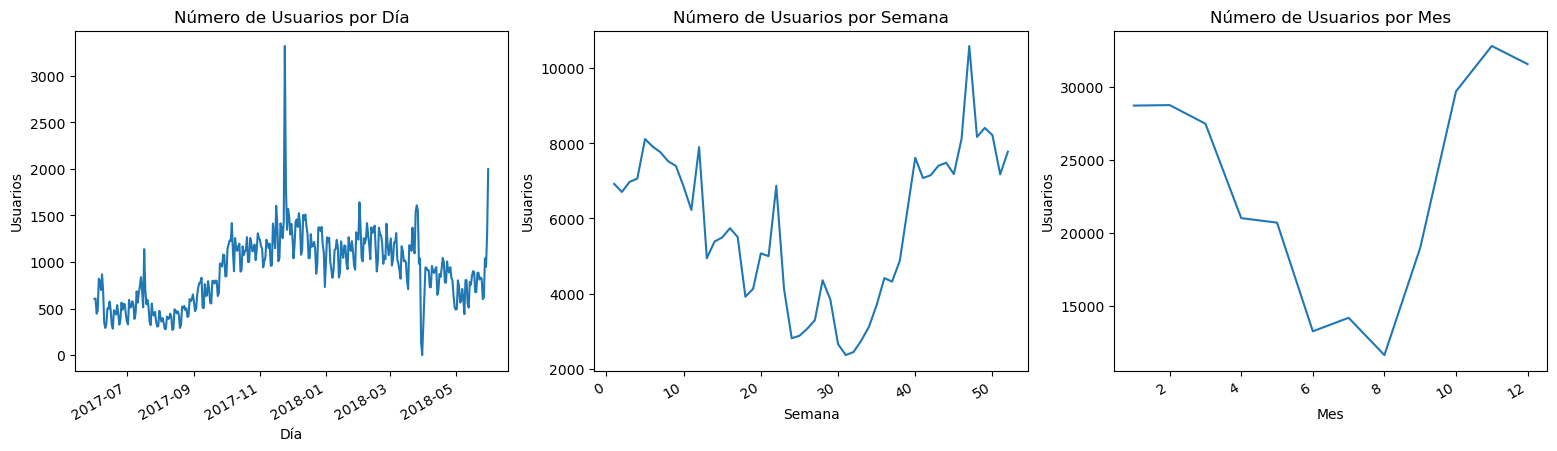

In [158]:
fig, ax = plt.subplots(1,3, figsize = (19, 5))

ax[0].plot(visitas_agregadas_por_dia)
ax[0].set(title = 'Número de Usuarios por Día', xlabel = 'Día', ylabel = 'Usuarios')
ax[1].plot(visitas_agregadas_por_semana)
ax[1].set(title = 'Número de Usuarios por Semana', xlabel = 'Semana', ylabel = 'Usuarios')
ax[2].plot(visitas_agregadas_por_mes)
ax[2].set(title = 'Número de Usuarios por Mes', xlabel = 'Mes', ylabel = 'Usuarios')
fig.autofmt_xdate(rotation = 30)
plt.show()

### Número de sesiones por día.

In [160]:
# ¿Cuál es el promedio de sesiones al día?

sesiones_por_dia = visitas.groupby('sesion_fecha')['uid'].count().mean().round().astype(int)
print('El promedio de sesiones por día es de: ', sesiones_por_dia)

El promedio de sesiones por día es de:  987


In [161]:
#Ahora vamos a ver la cantidad de sesiones que cada usuario hace por día.

sesiones_por_usuario = visitas.groupby('sesion_fecha').agg({'uid': ['count', 'nunique']})

In [162]:
# Modificación de nombres de columnas.

sesiones_por_usuario.columns = ['n_sesiones', 'n_usuarios']

In [163]:
# Creación de una nueva columna sesión por usuario.

sesiones_por_usuario['sesion_por_usuario'] = sesiones_por_usuario['n_sesiones']/sesiones_por_usuario['n_usuarios']

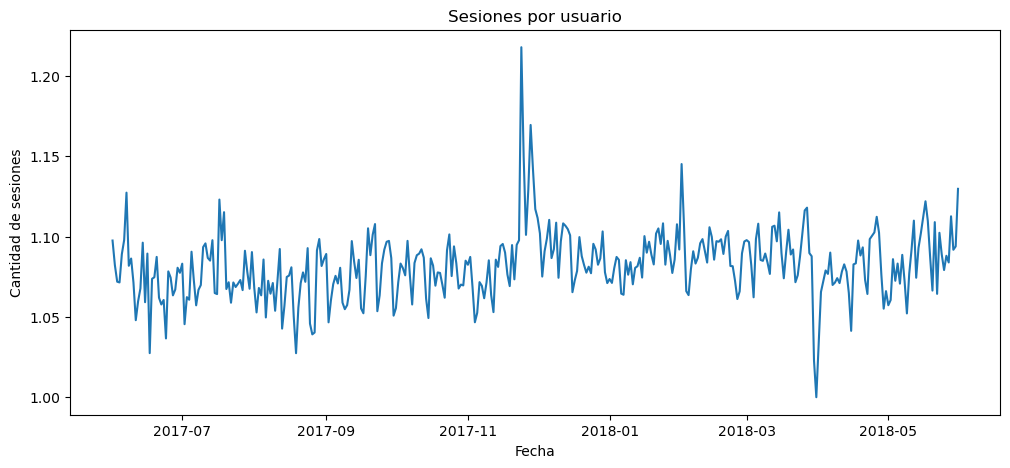

In [164]:
# Elaboración de un gráfico para una mejor visualización de las sesiones por usuario.

plt.figure(figsize = (12,5))
sesiones_por_usuario['sesion_por_usuario'].plot().set(
    title = 'Sesiones por usuario',
    xlabel = 'Fecha', 
    ylabel = 'Cantidad de sesiones')
plt.show()

In [165]:
print('El promedio de sesiones por usuario es de:', round(sesiones_por_usuario['sesion_por_usuario'].mean(), 2))

El promedio de sesiones por usuario es de: 1.08


In [166]:
# Creación de una nueva columna para la duración de la sesión.

visitas['duracion_sesion'] = (visitas['end_ts'] - visitas['start_ts']).dt.seconds

In [167]:
visitas['duracion_sesion'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duracion_sesion, dtype: float64

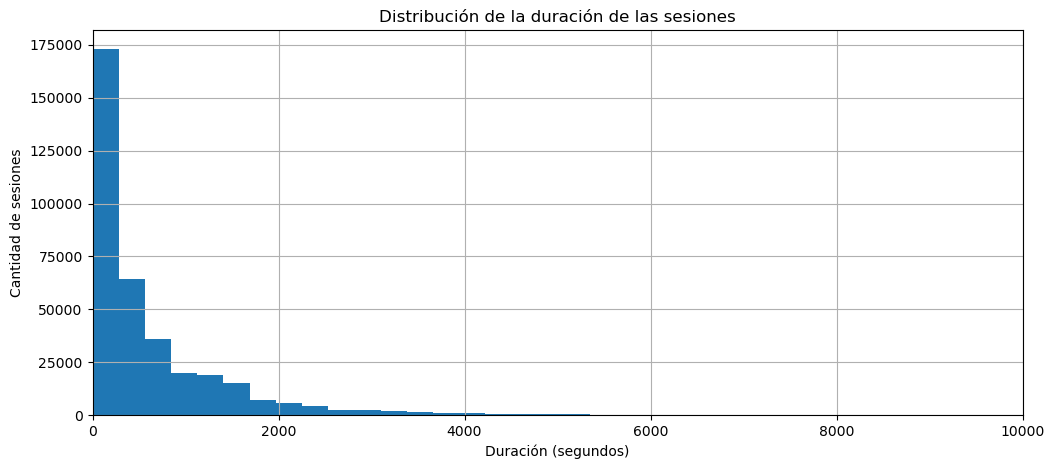

In [168]:
# Elaboración de un histograma para visualizar mejor la distribución de la duración de las sesiones.

plt.figure(figsize = (12,5))
visitas['duracion_sesion'].hist(bins = 300).set(
    title = 'Distribución de la duración de las sesiones',
    xlabel = 'Duración (segundos)',
    ylabel = 'Cantidad de sesiones')
plt.xlim(0, 10000)
plt.show()

In [169]:
print('El promedio de la duración de una sesión es de: ', round(visitas['duracion_sesion'].mean()/60))
print('La mediana de la duración de una sesión es de: ', round(visitas['duracion_sesion'].median()/60))
print('La moda de la duración de una sesión es de: ', round(visitas['duracion_sesion'].mode()[0]/60))

El promedio de la duración de una sesión es de:  11
La mediana de la duración de una sesión es de:  5
La moda de la duración de una sesión es de:  1


In [170]:
# Se va a calcular el porcentaje que se va y que se queda de los usuarios, vamos a calcular la retención.

primeras_visitas = visitas.groupby('uid')['start_ts'].min().reset_index()

In [171]:
# Renombran las columnas.

primeras_visitas.columns = ['uid', 'primera_sesion_start_ts']

In [172]:
# Cambio de tipo de dato a dos columnas.

primeras_visitas['primera_sesion_fecha'] = primeras_visitas['primera_sesion_start_ts'].dt.date
primeras_visitas['primera_sesion_mes'] = primeras_visitas['primera_sesion_start_ts'].dt.to_period('M')

In [173]:
primeras_visitas.head()

,uid,primera_sesion_start_ts,primera_sesion_fecha,primera_sesion_mes
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09


In [174]:
# Fusión de los dataframe primeras visitas y visitas por el uid.

visitas_full = pd.merge(primeras_visitas, visitas, on = 'uid')

In [175]:
# Cambio de datatype a dos columnas.

visitas_full['sesion_fecha'] = pd.to_datetime(visitas_full['sesion_fecha'])
visitas_full['primera_sesion_fecha'] = pd.to_datetime(visitas_full['primera_sesion_fecha'])

In [176]:
visitas_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   uid                      359400 non-null  uint64        
 1   primera_sesion_start_ts  359400 non-null  datetime64[ns]
 2   primera_sesion_fecha     359400 non-null  datetime64[ns]
 3   primera_sesion_mes       359400 non-null  period[M]     
 4   device                   359400 non-null  object        
 5   end_ts                   359400 non-null  datetime64[ns]
 6   source_id                359400 non-null  int64         
 7   start_ts                 359400 non-null  datetime64[ns]
 8   sesion_mes               359400 non-null  int32         
 9   sesion_semana            359400 non-null  UInt32        
 10  sesion_fecha             359400 non-null  datetime64[ns]
 11  duracion_sesion          359400 non-null  int32         
dtypes: UInt32(1), da

In [177]:
# Creación de columna que nos permida ver la edad en meses de las operaciones.

visitas_full['edad_meses'] = ((
    visitas_full['sesion_fecha'] - visitas_full['primera_sesion_fecha'])/(30*np.timedelta64(1, 'D'))).round().astype('int')

In [178]:
visitas_full.head()

,uid,primera_sesion_start_ts,primera_sesion_fecha,primera_sesion_mes,device,end_ts,source_id,start_ts,sesion_mes,sesion_semana,sesion_fecha,duracion_sesion,edad_meses
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,3,9,2018-03-01,360,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2,6,2018-02-06,120,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,6,23,2017-06-07,60,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,3,10,2018-03-11,360,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,9,38,2017-09-18,1080,0


In [179]:
visitas_full['edad_meses'].value_counts()

edad_meses
0     269867
1      20550
2      15094
3      11188
4      10194
5       7721
6       7452
7       5092
8       4424
9       3149
10      2292
11      1575
12       802
Name: count, dtype: int64

In [180]:
# Se ordenan valores por la columna: primera_sesion_fecha.

visitas_full.sort_values(by= 'primera_sesion_fecha')

,uid,primera_sesion_start_ts,primera_sesion_fecha,primera_sesion_mes,device,end_ts,source_id,start_ts,sesion_mes,sesion_semana,sesion_fecha,duracion_sesion,edad_meses
23146,1186757012633220834,2017-06-01 10:48:00,2017-06-01,2017-06,desktop,2017-07-28 12:12:00,1,2017-07-28 11:52:00,7,30,2017-07-28,1200,2
96924,4989871819839869689,2017-06-01 15:15:00,2017-06-01,2017-06,touch,2017-11-25 01:04:00,2,2017-11-25 01:00:00,11,47,2017-11-25,240,6
96923,4989871819839869689,2017-06-01 15:15:00,2017-06-01,2017-06,touch,2017-12-19 02:22:00,2,2017-12-19 02:02:00,12,51,2017-12-19,1200,7
96922,4989871819839869689,2017-06-01 15:15:00,2017-06-01,2017-06,touch,2017-06-01 15:27:00,2,2017-06-01 15:15:00,6,22,2017-06-01,720,0
96921,4989871819839869689,2017-06-01 15:15:00,2017-06-01,2017-06,touch,2018-01-25 17:36:00,2,2018-01-25 17:16:00,1,4,2018-01-25,1200,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338040,17319230204043134264,2018-05-31 22:40:00,2018-05-31,2018-05,desktop,2018-05-31 23:10:00,2,2018-05-31 22:40:00,5,22,2018-05-31,1800,0
310149,15845953194300008222,2018-05-31 16:00:00,2018-05-31,2018-05,desktop,2018-05-31 16:05:00,4,2018-05-31 16:00:00,5,22,2018-05-31,300,0
220340,11264067749718153135,2018-05-31 23:22:00,2018-05-31,2018-05,touch,2018-05-31 23:25:00,4,2018-05-31 23:22:00,5,22,2018-05-31,180,0
218915,11217684785870472309,2018-05-31 09:27:00,2018-05-31,2018-05,desktop,2018-05-31 09:50:00,2,2018-05-31 09:27:00,5,22,2018-05-31,1380,0


In [181]:
# Elaboración de tabla dinámica que nos permita crear las cohortes.

cohortes = visitas_full.pivot_table(
    index = 'primera_sesion_mes',
    columns = 'edad_meses',
    values = 'uid',
    aggfunc = 'nunique'
)

In [182]:
# Modificación de visualización de valores ausentes.

cohortes.fillna('')

edad_meses,0,1,2,3,4,5,6,7,8,9,10,11,12
primera_sesion_mes,,,,,,,,,,,,,
2017-06,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [183]:
# Creación del nuevo dataframe para la información de la retención.

retencion = pd.DataFrame()

In [184]:
# Creación de un for para crear una nueva tabla concatenando la división de cada columna sobre la inicial de cada mes.

for columna in cohortes.columns:
    retencion = pd.concat([retencion, cohortes[columna]/cohortes[0]], axis = 1)

In [185]:
retencion.columns = cohortes.columns

In [186]:
retencion.index = [str(indice)[0:10] for indice in retencion.index]

### ¿Con qué frecuencia los usuarios regresan?

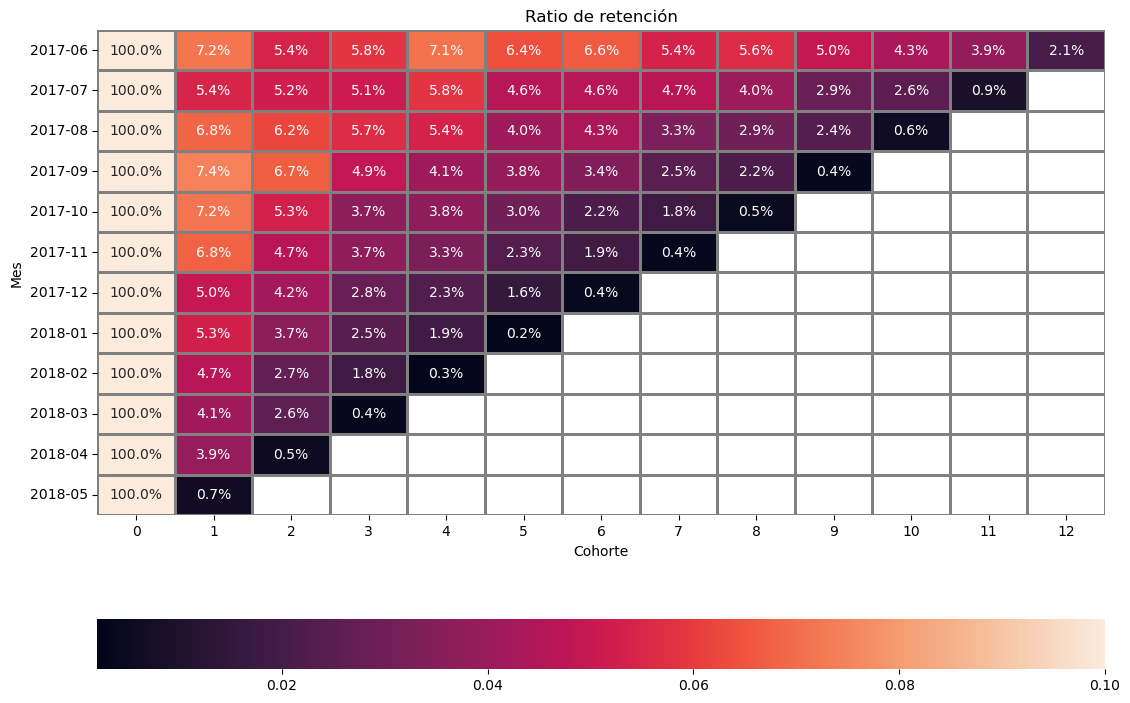

In [188]:
# Diseño de mapa de calor que nos permita visualizar el ratio de retención de los usuarios.

plt.figure(figsize = (13, 9))
sns.heatmap(retencion, 
            annot = True,
            fmt = '.1%',
            linewidths = 1,
            linecolor = 'grey', 
            vmax = 0.1,
            cbar_kws = {'orientation': 'horizontal'}).set(
            title = 'Ratio de retención',
            ylabel = 'Mes',
            xlabel = 'Cohorte')
plt.show()

In [189]:
# Promedio de retención para la primera cohorte.

print(retencion[1].mean())

0.05361100820922162


Ventas:

1. ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)<br>
2. ¿Cuántos pedidos hacen durante un período de tiempo dado?<br>
3. ¿Cuál es el tamaño promedio de compra?<br>
4. ¿Cuánto dinero traen? (LTV)

In [191]:
# Creación de una nueva tabla llamada compras.

compras = visitas_full.merge(ordenes, on = 'uid', how = 'outer')

In [192]:
# Elaboración de una nueva columna llamada buy day.

compras['buy_day'] = pd.to_datetime(compras['buy_ts'].dt.date)

In [193]:
# Agrupamiento por la columna 'uid' para traer la información de la primera sesión y la fecha de compra.

compras_conversion = compras.groupby('uid')[['primera_sesion_fecha', 'buy_day']].min().reset_index()

In [194]:
# Se crea una nueva columna para obtener la información de la conversión en días.

compras_conversion['conversion_dias'] = (
    compras_conversion['buy_day'] - compras_conversion['primera_sesion_fecha']).dt.days

In [195]:
# Eliminación  de valores ausentes.

compras_conversion.dropna()

,uid,primera_sesion_fecha,buy_day,conversion_dias
3,313578113262317,2017-09-18,2018-01-03,107.0
22,1575281904278712,2017-06-03,2017-06-03,0.0
35,2429014661409475,2017-10-11,2017-10-11,0.0
36,2464366381792757,2018-01-27,2018-01-28,1.0
38,2551852515556206,2017-11-24,2017-11-24,0.0
...,...,...,...,...
228142,18445147675727495770,2017-08-20,2017-11-24,96.0
228143,18445407535914413204,2017-09-22,2017-09-22,0.0
228148,18445601152732270159,2017-08-07,2018-03-26,231.0
228161,18446156210226471712,2017-11-07,2018-02-18,103.0


In [196]:
# Agrupación por la columna 'converión_días para contar los 'uid' que caen en cada día de conversión.

conversion = compras_conversion.groupby('conversion_dias')['uid'].count().reset_index()

In [197]:
# Filtrado de información para obtener los visitantes que se convirteron en clientes el mismo día de su visita.

conversion_0_dias = conversion.query('conversion_dias == 0.0').sum()
conversion_0_dias = conversion_0_dias['uid']

In [198]:
# Filtrado de información para obtener los visitantes que se convirteron en clientes a la semana de su primer visita.

conversion_7_dias = conversion.query('conversion_dias <= 7.0').sum()
conversion_7_dias = conversion_7_dias['uid']

In [199]:
# Filtrado de información para obtener los visitantes que se convirteron en clientes al mes de su primer visita.

conversion_30_dias = conversion.query('conversion_dias <= 30.0').sum()
conversion_30_dias = conversion_30_dias['uid']

In [200]:
# Filtrado de información para obtener los visitantes que se convirteron en clientes en un año.

conversion_anual = conversion.query('conversion_dias <= 365.0').sum()
conversion_anual = conversion_anual['uid']
conversion_anual_porcentaje = f'{conversion_anual/conversion_anual*100:.2f}%'

In [201]:
# Se cambia el formato de la información.

porcentaje_conversion_0 = f'{(conversion_0_dias/conversion_anual)*100:.2f}%'
porcentaje_conversion_7 = f'{(conversion_7_dias/conversion_anual)*100:.2f}%'
porcentaje_conversion_30 = f'{(conversion_30_dias/conversion_anual)*100:.2f}%'

# ¿Cuándo empieza la gente a comprar?

In [203]:
print(f'Conversión 0 días: ',porcentaje_conversion_0)
print(f'Conversión 7 días: ',porcentaje_conversion_7) 
print(f'Conversión 30 días: ',porcentaje_conversion_30)
print(f'Conversión anual: ',conversion_anual_porcentaje) 

Conversión 0 días:  68.56%
Conversión 7 días:  80.32%
Conversión 30 días:  86.49%
Conversión anual:  100.00%


El 68.56% de nuestros visitadores se convirtieron en clientes el mismo día de su visita.<br>El 86.49% de nuestros visitadores ya se habían convertido en clientes al mes de su primer visita. <br> En el año que realizamos de análisis el 100% de nuestros visitantes se convirtieron en clientes.

In [205]:
pedidos = compras.groupby('buy_day')['uid'].nunique().reset_index()

In [206]:
pedidos['uid'].mean()

127.87912087912088

In [323]:
ordenes_analisis = ordenes.copy()

In [207]:
ordenes_analisis['buy_day'] = pd.to_datetime(ordenes_analisis['buy_ts'].dt.date)

In [208]:
ordenes_analisis['buy_week'] = ordenes_analisis['buy_ts'].dt.isocalendar().week

In [209]:
ordenes_analisis['buy_mes'] = ordenes_analisis['buy_ts'].dt.month

In [210]:
ordenes_diarias = ordenes_analisis.groupby('buy_day')['uid'].nunique().sort_index()

In [211]:
ordenes_semanales = ordenes_analisis.groupby('buy_week')['uid'].nunique().sort_index()

In [212]:
ordenes_mensuales = ordenes_analisis.groupby('buy_mes')['uid'].nunique().sort_index()

# ¿Cuántos pedidos hacen durante un período de tiempo dado?
Pedidos por día, mes y semana.

In [214]:
print(f'Promedio de pedidos por día:', round(ordenes_diarias.mean()))
print(f'Promedio de pedidos por semana:', round(ordenes_semanales.mean()))
print(f'Promedio de pedidos por mes:', round(ordenes_mensuales.mean()))

Promedio de pedidos por día: 128
Promedio de pedidos por semana: 833
Promedio de pedidos por mes: 3418


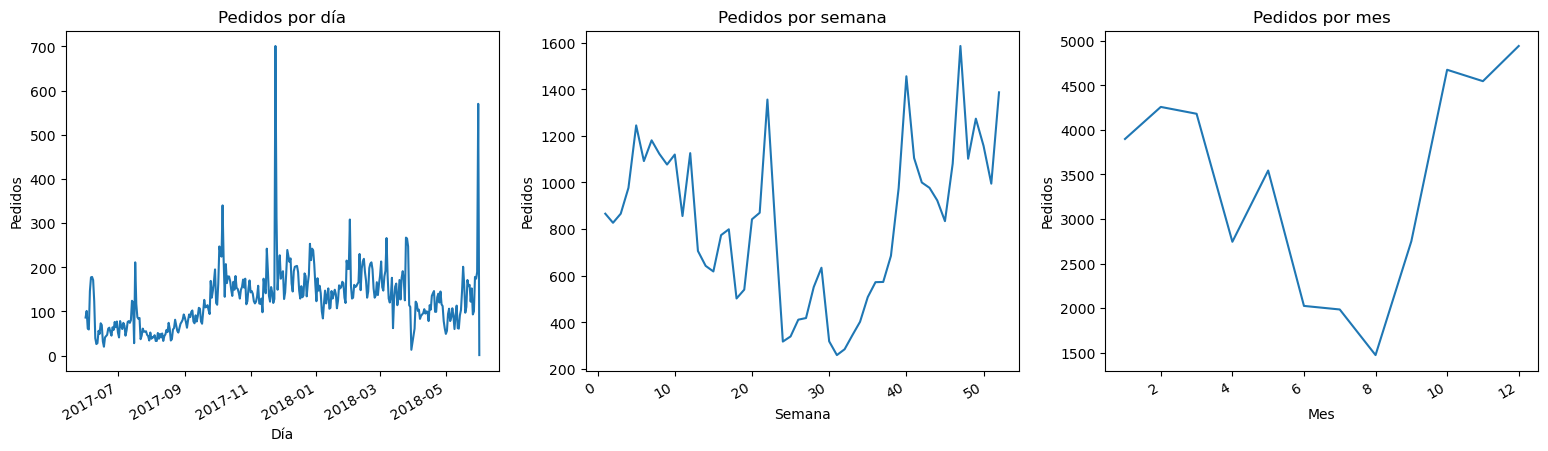

In [215]:
fig, ax = plt.subplots(1,3, figsize = (19, 5))

ax[0].plot(ordenes_diarias)
ax[0].set(title = 'Pedidos por día', xlabel = 'Día', ylabel = 'Pedidos')
ax[1].plot(ordenes_semanales)
ax[1].set(title = 'Pedidos por semana', xlabel = 'Semana', ylabel = 'Pedidos')
ax[2].plot(ordenes_mensuales)
ax[2].set(title = 'Pedidos por mes', xlabel = 'Mes', ylabel = 'Pedidos')
fig.autofmt_xdate(rotation = 30)
plt.show()

# ¿Cuál es el tamaño promedio de compra?
Facturación diaria, semanal y mensual.

In [217]:
facturacion_diaria = ordenes_analisis.groupby('buy_day')['revenue'].sum().sort_index()
facturacion_semanal = ordenes_analisis.groupby('buy_week')['revenue'].sum().sort_index()
facturacion_mensual = ordenes_analisis.groupby('buy_mes')['revenue'].sum().sort_index()

In [218]:
print(f'Promedio de facturación por día: $',round(facturacion_diaria.mean()))
print(f'Promedio de facturación por semana: $',round(facturacion_semanal.mean()))
print(f'Promedio de facturación por mes: $',round(facturacion_mensual.mean()))

Promedio de facturación por día: $ 692
Promedio de facturación por semana: $ 4847
Promedio de facturación por mes: $ 21005


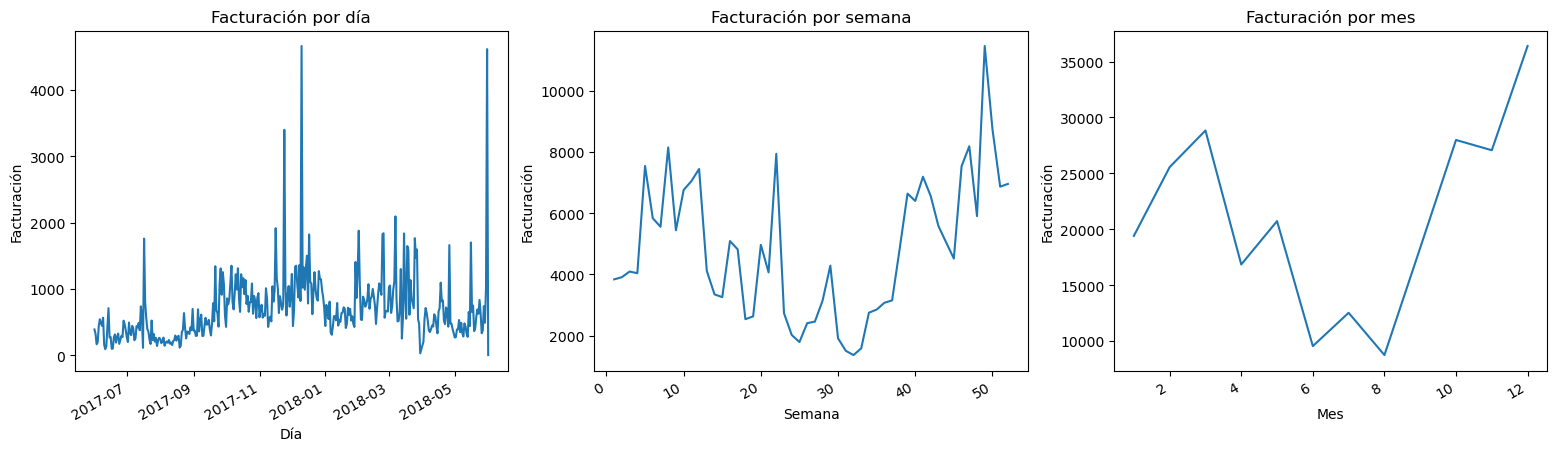

In [219]:
fig, ax = plt.subplots(1,3, figsize = (19, 5))

ax[0].plot(facturacion_diaria)
ax[0].set(title = 'Facturación por día', xlabel = 'Día', ylabel = 'Facturación')
ax[1].plot(facturacion_semanal)
ax[1].set(title = 'Facturación por semana', xlabel = 'Semana', ylabel = 'Facturación')
ax[2].plot(facturacion_mensual)
ax[2].set(title = 'Facturación por mes', xlabel = 'Mes', ylabel = 'Facturación')
fig.autofmt_xdate(rotation = 30)
plt.show()

In [339]:
ordenes_ltv = ordenes.copy()

In [347]:
ordenes_ltv['orden_mes'] = ordenes['buy_ts'].dt.to_period('M')

In [355]:
ordenes_ltv['orden_mes'] = ordenes_ltv['orden_mes'].dt.start_time

In [363]:
primeras_ordenes = ordenes_ltv.groupby('uid').agg({'orden_mes': 'min'}).reset_index()
primeras_ordenes.columns = ['uid', 'primera_orden_mes']
primeras_ordenes.head()

,uid,primera_orden_mes
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [365]:
cohorts_sizes = primeras_ordenes.groupby('primera_orden_mes').agg({'uid': 'nunique'}).reset_index()
cohorts_sizes.columns = ['primera_orden_mes', 'n_buyers']
cohorts_sizes.head()

,primera_orden_mes,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [369]:
ordenes_primeras = pd.merge(ordenes_ltv, primeras_ordenes, on = 'uid')
ordenes_primeras.head()

,buy_ts,revenue,uid,orden_mes,primera_orden_mes
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [371]:
cohortes_pedidos = ordenes_primeras.groupby(['primera_orden_mes', 'orden_mes']).agg({'revenue': 'sum'}).reset_index()
cohortes_pedidos.head()

,primera_orden_mes,orden_mes,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [409]:
reporte = pd.merge(cohorts_sizes, cohortes_pedidos, on = 'primera_orden_mes')
reporte.head()

,primera_orden_mes,n_buyers,orden_mes,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [415]:
reporte['edad'] = ((reporte['orden_mes']-reporte['primera_orden_mes'])/(30* np.timedelta64(1, 'D'))).round().astype('int')

In [419]:
reporte['ltv'] = reporte['revenue'] / reporte['n_buyers']
reporte.head()

,primera_orden_mes,n_buyers,orden_mes,revenue,edad,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [615]:
reporte['primera_orden_mes'] = reporte['primera_orden_mes'].dt.to_period('M')

AttributeError: 'PeriodProperties' object has no attribute 'to_period'

In [559]:
ltv = reporte.pivot_table(
    index = 'primera_orden_mes',
    columns = 'edad',
    values = 'ltv',
    aggfunc = 'sum').round(2)

ltv.fillna('')

edad,0,1,2,3,4,5,6,7,8,9,10,11
primera_orden_mes,,,,,,,,,,,,
2017-06,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02,4.16,0.28,0.08,0.07,,,,,,,,


In [561]:
ganancias_acumuladas = pd.DataFrame(columns=[f'{i}' for i in range(12)])

for index, row  in ltv.iterrows():
    acumulado = 0
    acumulados_fila = []
    for mes in range(12):
        acumulado += row[mes]
        acumulados_fila.append(acumulado)

    ganancias_acumuladas.loc[index] = acumulados_fila
    
ganancias_acumuladas.fillna('')

,0,1,2,3,4,5,6,7,8,9,10,11
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12,4.74,5.0,5.93,7.0,7.31,7.65,,,,,,
2018-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02,4.16,4.44,4.52,4.59,,,,,,,,
2018-03,4.84,5.14,5.46,,,,,,,,,


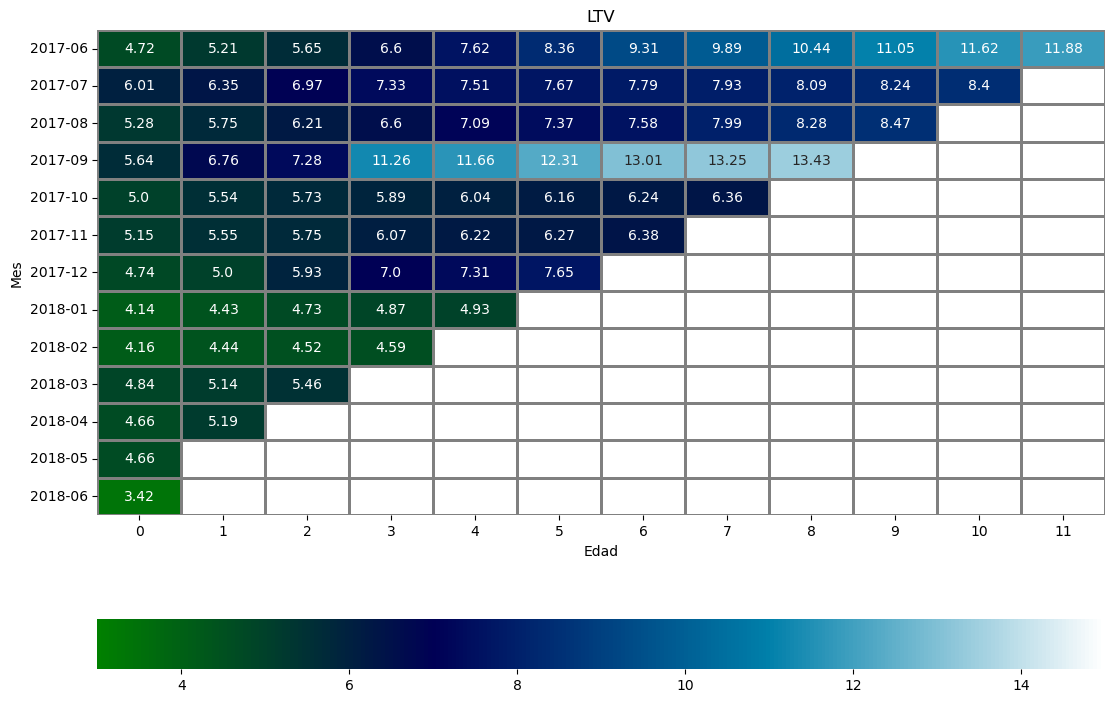

In [575]:
plt.figure(figsize = (13,9))
sns.heatmap(ganancias_acumuladas,
            annot = True,
            fmt = '.11',
            linewidths = 1,
            linecolor = 'grey',
            vmax = 15,
            vmin = 3,
            cmap = 'ocean',
            cbar_kws = {'orientation' : 'horizontal'}).set(
            title = 'LTV',
            xlabel = 'Edad',
            ylabel = 'Mes')

plt.show()

In [587]:
costos_ = costos.copy()

In [597]:
costos_['orden_mes'] = costos_['dt'].dt.to_period('M')

In [599]:
costos_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
 3   orden_mes  2542 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), period[M](1)
memory usage: 79.6 KB


In [661]:
costos_source = costos_.groupby(['orden_mes','source_id'])['costs'].sum().reset_index()

In [663]:
costos_source

,orden_mes,source_id,costs
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12
...,...,...,...
79,2018-05,3,9411.42
80,2018-05,4,4214.21
81,2018-05,5,3669.56
82,2018-05,9,362.17


In [659]:
reporte_ = reporte.copy()

In [679]:
reporte_['orden_mes'] = reporte_['orden_mes'].dt.to_period('M')

In [681]:
costos_ltv = pd.merge(reporte_, costos_source, on = 'orden_mes')

In [697]:
costos_ltv['ltvxsource'] = costos_ltv['costs']/costos_ltv['n_buyers']

<Axes: xlabel='source_id', ylabel='Count'>

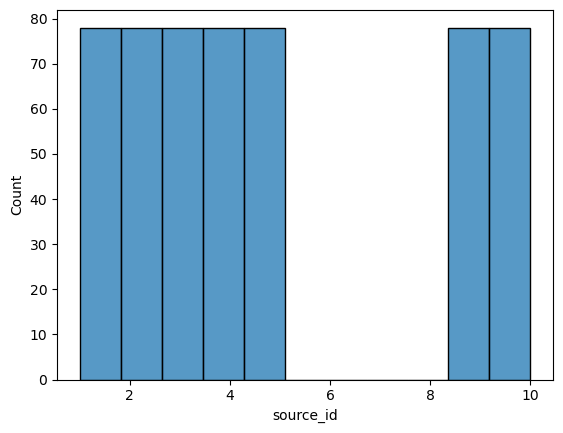

In [707]:
sns.histplot(costos_ltv['source_id'])

In [711]:
costos_ltv_source = costos_ltv.groupby('source_id')['costs'].sum()

In [713]:
costos_ltv_source

source_id
1     143247.32
2     292631.43
3     968277.82
4     415948.36
5     354919.00
9      37649.67
10     39621.52
Name: costs, dtype: float64

In [729]:
costos_source_ = costos_.groupby('source_id')['costs'].sum().reset_index()

In [731]:
costos_source_

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [733]:
revenue_total = reporte_['revenue'].sum()

In [735]:
revenue_total

252057.2

In [737]:
ltv_costooooos = costos_source_['costs'][0]/revenue_total

In [739]:
ltv_costooooos

0.08265294544254241

In [673]:
costos_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   orden_mes  84 non-null     period[M]
 1   source_id  84 non-null     int64    
 2   costs      84 non-null     float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 2.1 KB


In [677]:
reporte_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   primera_orden_mes  79 non-null     period[M]     
 1   n_buyers           79 non-null     int64         
 2   orden_mes          79 non-null     datetime64[ns]
 3   revenue            79 non-null     float64       
 4   edad               79 non-null     int64         
 5   ltv                79 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), period[M](1)
memory usage: 3.8 KB


Marketing:
1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)<br>
2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?<br>
3. ¿Cuán rentables eran las inversiones? (ROMI)